# Лабораторная работа №7

## "Численное решение задачи Коши для систем ОДУ"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

---

### Задача 7.1

Дана задача Коши для системы двух обыкновенных дифференциальных уравнений:   
\begin{equation*}
    \begin{cases}
        u' = f_0(t, u, v) 
        \\
        v' = f_1(t, u, v) 
        \\
        u(0) = 1, v(0) = 1
    \end{cases}
\end{equation*}
**ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:**
1. Модифицировать программу решения задачи по явному методу Эйлера из лабораторной работы 6 для решения системы дифференциальных уравнений. Найти приближенное решение задачи Коши с шагом $h=0.01$. на отрезке $[0,1]$. Оценить величину погрешности по правилу Рунге.
2. Модифицировать программу решения задачи по индивидуальному варианту из лабораторной работы 6 для решения системы дифференциальных уравнений. Найти приближенное решение задачи Коши с шагом $h=0.01$ на отрезке $[0,1]$. Оценить величину погрешности по правилу Рунге.
3. На одном чертеже построить графики первой компоненты $u(t)$ найденного обоими методами решения, а на другом - графики второй компоненты $v(t)$ найденного обоими методами решения.
4. Сравнить полученные результаты.

Вариант $N = 39$:   
$f_0(t, u, v) = \sin{u} + \cos{v}$   
$f_1(t, u, v) = \cos(u-v)$

In [3]:
# Метод Эйлера для системы ОДУ
def Eiler(y0, t, f, h):
    y = np.zeros((len(y0), len(t)))
    y[:,0] = y0
    for j in range(len(t)-1):
        y_j = f(y[:,j], t[j])
        for i in range(len(y_j)):
            y_j[i] = y_j[i] * h + y[i][j]
        y[:, j + 1] = y_j
    return y

# Метод Рунге-Кутта 3-го порядка (вспомогательный для метода Адамса)
def RungeKutta3(y_j, t_j, f, h):
    k1 = np.zeros(len(y_j))
    k1 = f(y_j, t_j)
    k2 = np.zeros(len(y_j))
    k2 = f(y_j + 0.5 * h * k1, t_j + 0.5 * h)
    k3 = np.zeros(len(y_j))
    k3 = f(y_j - h * k1 + 2 * h * k2, t_j + h)
    return y_j + (h/6)*(k1 + 4 * k2 + k3)

# Экстраполяционный метод Адамса 3-го порядка для системы ОДУ
def ExtrapolAdams3(y0, t, f, h):
    y = np.zeros((len(y0), len(t)))
    y[:,0] = y0
    y[:,1] = RungeKutta3(y[:,0], t[0], f, h)
    y[:,2] = RungeKutta3(y[:,1], t[1], f, h)
    for j in range(2, len(t) - 1):
        a = f(y[:,j],t[j])
        b = f(y[:,j-1],t[j-1])
        c = f(y[:,j-2],t[j-2])
        y[:, j+1] = y[:,j] + (h/12)*(23*a - 16*b + 5*c)
    return y

# Погрешность по правилу Рунге
def RungeR(method, y0, t, f, h, p):
    y_2h = method(y0, t, f, h)
    t = np.arange(t[0], t[len(t) - 1] + h/2, h/2)
    y_h = method(y0, t, f, h/2)
    eps = np.array([(y_h[:, 2*j + 1] - y_2h[:, j]) / (2**p - 1) for j in range(len(y_2h[0]) - 1)])
    eps = np.array([np.abs(eps[0]).max(), np.abs(eps[1]).max()])
    return eps

In [4]:
def F(y_j, t_j):
    dUdt = np.sin(y_j[0]) + np.cos(y_j[1])
    dVdt = np.cos(y_j[0] - y_j[1])
    return np.array([dUdt, dVdt])

h = 0.01
t0, T = 0, 1
t = np.arange(t0, T + h, h)
y0 = np.array([1,1])

# Встроенный метод
real_y = odeint(F, y0, t)

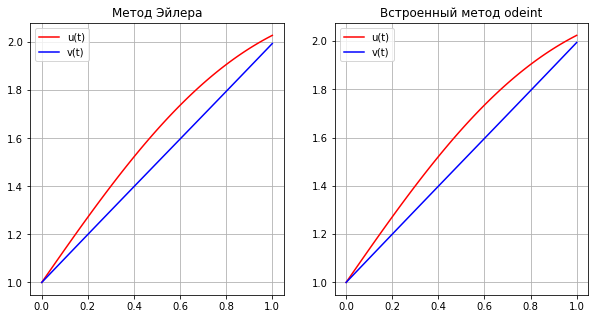

In [5]:
eiler_y = Eiler(y0, t, F, h)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Метод Эйлера')
axs[0].plot(t, eiler_y[0], color='r', label='u(t)')
axs[0].plot(t, eiler_y[1], color='b', label='v(t)')
axs[0].legend()
axs[0].grid()

axs[1].set_title('Встроенный метод odeint')
axs[1].plot(t, real_y[:, 0], color='r', label='u(t)')
axs[1].plot(t, real_y[:, 1], color='b', label='v(t)')
axs[1].legend()
axs[1].grid()

In [6]:
eiler_error = RungeR(Eiler, y0, t, F, h, 1)
print("Погрешность величины u для метода Эйлера =", eiler_error[0])
print("Погрешность величины v для метода Эйлера =", eiler_error[1])

Погрешность величины u для метода Эйлера = 0.006908866453380291
Погрешность величины v для метода Эйлера = 0.006901071237688905


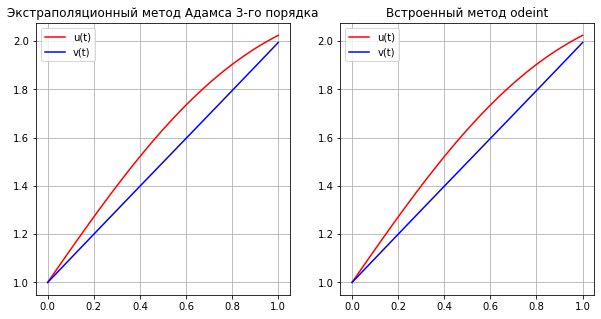

In [7]:
adams_y = ExtrapolAdams3(y0, t, F, h)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Экстраполяционный метод Адамса 3-го порядка')
axs[0].plot(t, adams_y[0], color='r', label='u(t)')
axs[0].plot(t, adams_y[1], color='b', label='v(t)')
axs[0].legend()
axs[0].grid()

axs[1].set_title('Встроенный метод odeint')
axs[1].plot(t, real_y[:, 0], color='r', label='u(t)')
axs[1].plot(t, real_y[:, 1], color='b', label='v(t)')
axs[1].legend()
axs[1].grid()

In [8]:
adams_error = RungeR(ExtrapolAdams3, y0, t, F, h, 3)
print("Погрешность величины u для метода Адамса =", adams_error[0])
print("Погрешность величины v для метода Адамса =", adams_error[1])

Погрешность величины u для метода Адамса = 0.000986804918756182
Погрешность величины v для метода Адамса = 0.0009860090619238729


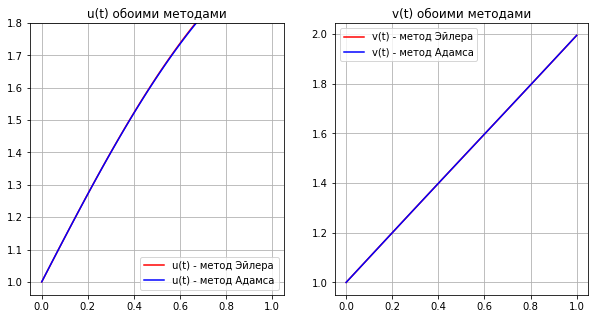

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('u(t) обоими методами')
axs[0].set_ylim([0.96, 1.8])
axs[0].plot(t, eiler_y[0], color='r', label='u(t) - метод Эйлера')
axs[0].plot(t, adams_y[0], color='b', label='u(t) - метод Адамса')
axs[0].legend()
axs[0].grid()

axs[1].set_title('v(t) обоими методами')
axs[1].plot(t, eiler_y[1], color='r', label='v(t) - метод Эйлера')
axs[1].plot(t, adams_y[1], color='b', label='v(t) - метод Адамса')
axs[1].legend()
axs[1].grid()

**Вывод:** графики практически идеально совпадают - это сигнализирует о том, что построенный алгоритм и произведенные вычисления верны.

---

### Задача 7.2

Дана задача Коши для двух систем обыкновенных дифференциальных уравнений с постоянными коэффициентами:   
$$Y'(t) = AY(t), Y(0) = Y_0,$$
$$Z'(t) = BZ(t), Z(0) = Z_0,$$
где $A$ и $B$ - заданные матрицы, $Y_0$ и $Z_0$ - заданные векторы. Исследовать поведение решения систем уравнений.

**ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:**
1. Используя встроенную функцию пакета NUMPY для нахождения собственных чисел матриц A и B, найти коэффициенты жесткости обеих систем. Установить, какая задача является жесткой.
2. Численно решить обе задачи на отрезке $[0,1]$ c шагом $h=0.01$ явным методом Эйлера. Определить, для какой из задач явный метод неустойчив при данном шаге $h$. Построить графики компонент полученного решения.
3. Численно решить обе задачи на отрезке $[0,1]$ c шагом $h=0.01$ по индивидуальному варианту из лабораторной работы 6.  Определить, для какой из задач метод неустойчив при данном шаге $h$. Построить графики компонент полученного решения.
4. Для жесткой задачи экспериментально подобрать шаг $h$, при котором графики компонент решения, полученного по явному методу Эйлера, визуально совпадают с графиками компонент решения, полученного по неявному методу с шагом $h=0.01$. Сравнить найденное значение шага с теоретическим значением шага, при котором явный метод Эйлера для жестких задач должен быть устойчивым.
5. Сравнить полученные результаты.

Вариант $N = 39$:
$$ A = 
\begin{pmatrix}
  -9.769 & -0.19 & 1.4 & -1.102\\
  -0.259 & -7.833 & -1.166 & 0.967\\
  -0.945 & 1.179 & -2.007 & 6.836\\
  -1.501 & 0.967 & -6.76 & -2.391
\end{pmatrix},
Y_0 = 
\begin{pmatrix}
  7.2\\
  8\\
  5.2\\
  8
\end{pmatrix}
$$

$$ B = 
\begin{pmatrix}
  -59.993 & -19.683 & -22.495 & 138.156\\
  110.216 & -50.679 & -55.251 & -57.296\\
  -79.09 & 34.35 & -268.27 & 26.665\\
  39.72 & -130.06 & -67.731 & -187.06
\end{pmatrix},
Z_0 = 
\begin{pmatrix}
  10.4\\
  5.2\\
  8.4\\
  5.2
\end{pmatrix}
$$

In [96]:
A = np.array([-9.769, -0.19, 1.4, -1.102,
              -0.259, -7.833, -1.166, 0.967,
              -0.945, 1.179, -2.007, 6.836,
              -1.501, 0.967, -6.76, -2.391]).reshape(4, 4)

B = np.array([-59.993, -19.683, -22.495, 138.156,
              110.216, -50.679, -55.251, -57.296,
              -79.09, 34.35, -268.27, 26.665,
              39.72, -130.06, -67.731, -187.06]).reshape(4, 4)

Y0 = np.array([7.2, 8, 5.2, 8])
Z0 = np.array([10.4, 5.2, 8.4, 5.2])

In [97]:
eigs_val_A = np.linalg.eigvals(A)
print("Собственные числа матрицы А:")
display(eigs_val_A)
eigs_val_B = np.linalg.eigvals(B)
print("Собственные числа матрицы B:")
display(eigs_val_B)

Собственные числа матрицы А:


array([ -2.00005221+7.00023619j,  -2.00005221-7.00023619j,
       -10.00017505+0.j        ,  -7.99972054+0.j        ])

Собственные числа матрицы B:


array([  -3.00071223+89.99983032j,   -3.00071223-89.99983032j,
       -280.00028777+70.00010026j, -280.00028777-70.00010026j])

In [98]:
eigs_val_A = eigs_val_A.real
print("Вещественные части собственных чисел матрицы А:")
display(eigs_val_A)
eigs_val_B = eigs_val_B.real
print("Вещественные части собственных чисел матрицы B:")
display(eigs_val_B)

Вещественные части собственных чисел матрицы А:


array([ -2.00005221,  -2.00005221, -10.00017505,  -7.99972054])

Вещественные части собственных чисел матрицы B:


array([  -3.00071223,   -3.00071223, -280.00028777, -280.00028777])

In [99]:
k_stiffness_A = abs(eigs_val_A).max() / abs(eigs_val_A).min()
print("Коэффициент жесткости для первой системы =", k_stiffness_A)
k_stiffness_B = abs(eigs_val_B).max() / abs(eigs_val_B).min()
print("Коэффициент жесткости для второй системы =", k_stiffness_B)

Коэффициент жесткости для первой системы = 4.999957008579356
Коэффициент жесткости для второй системы = 93.31127623938048


**Вывод:** коэффициент жесткости для второй системы много больше единицы, из чего следует по определению, что это система является жесткой. А вот у первой системы коэффициент жесткости ненамного больше, чем 1, так что сказать однозначно, жесткая ли эта система или нет - пока нельзя. Далее будет дан ответ на этот вопрос.

In [100]:
def F1(y_j, t_j):
    result = A @ y_j
    return np.array(result)

def F2(y_j, t_j):
    result = B @ y_j
    return np.array(result)

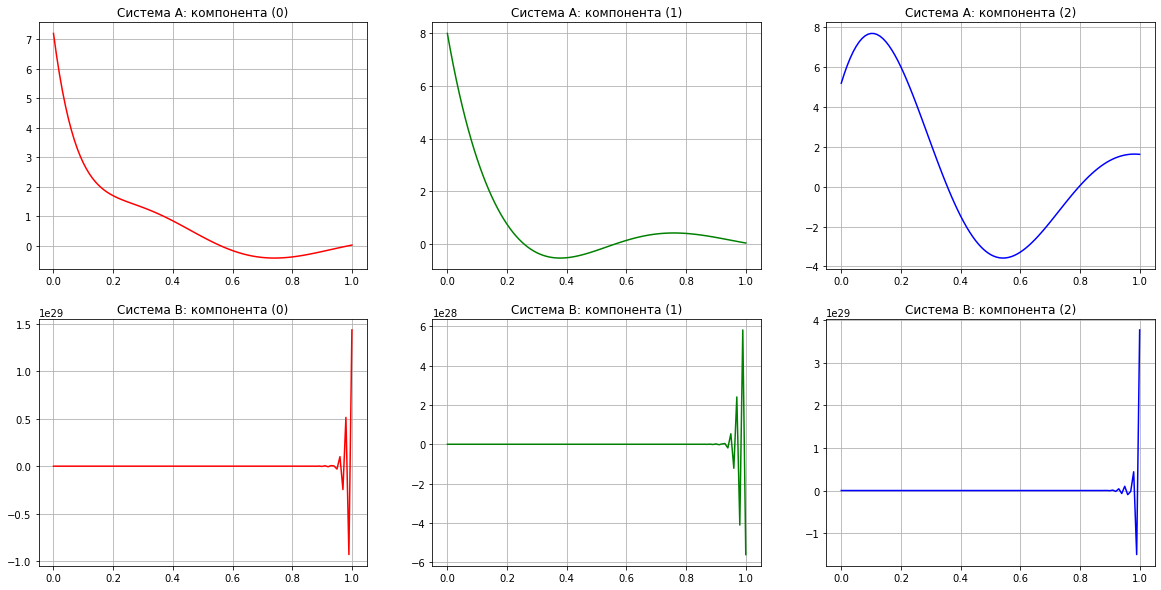

In [101]:
h = 0.01
t0, T = 0, 1
t = np.arange(t0, T + h, h)

eiler_y_A = Eiler(Y0, t, F1, h)
eiler_y_B = Eiler(Z0, t, F2, h)

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0][0].set_title('Система А: компонента (0)')
axs[0][0].plot(t, eiler_y_A[0], color='r')
axs[0][0].grid()
axs[0][1].set_title('Система А: компонента (1)')
axs[0][1].plot(t, eiler_y_A[1], color='g')
axs[0][1].grid()
axs[0][2].set_title('Система А: компонента (2)')
axs[0][2].plot(t, eiler_y_A[2], color='b')
axs[0][2].grid()

axs[1][0].set_title('Система B: компонента (0)')
axs[1][0].plot(t, eiler_y_B[0], color='r')
axs[1][0].grid()
axs[1][1].set_title('Система B: компонента (1)')
axs[1][1].plot(t, eiler_y_B[1], color='g')
axs[1][1].grid()
axs[1][2].set_title('Система B: компонента (2)')
axs[1][2].plot(t, eiler_y_B[2], color='b')
axs[1][2].grid()

Для второй задачи явный метод Эйлера при данном шаге $h$ является, очевидно, неустойчивым, если судить по графикам - они расходятся. А вот для первой - больше похоже на то, что метод все-таки сойдется. Хотя в общем случае все явные методы являются неустойчивыми для жестких систем, первая система имеет не слишком большой коэффициент жесткости, как следствие, метод понемногу сходится, так что первую систему все-таки нельзя считать жесткой.

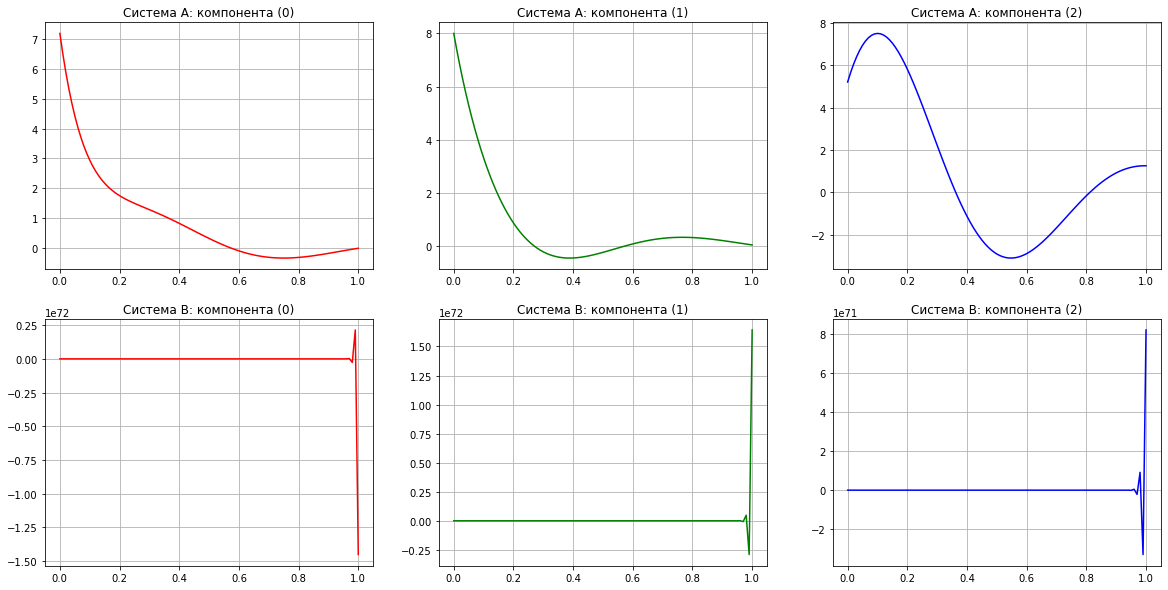

In [102]:
h = 0.01
t0, T = 0, 1
t = np.arange(t0, T + h, h)

adams_y_A = ExtrapolAdams3(Y0, t, F1, h)
adams_y_B = ExtrapolAdams3(Z0, t, F2, h)

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0][0].set_title('Система А: компонента (0)')
axs[0][0].plot(t, adams_y_A[0], color='r')
axs[0][0].grid()
axs[0][1].set_title('Система А: компонента (1)')
axs[0][1].plot(t, adams_y_A[1], color='g')
axs[0][1].grid()
axs[0][2].set_title('Система А: компонента (2)')
axs[0][2].plot(t, adams_y_A[2], color='b')
axs[0][2].grid()

axs[1][0].set_title('Система B: компонента (0)')
axs[1][0].plot(t, adams_y_B[0], color='r')
axs[1][0].grid()
axs[1][1].set_title('Система B: компонента (1)')
axs[1][1].plot(t, adams_y_B[1], color='g')
axs[1][1].grid()
axs[1][2].set_title('Система B: компонента (2)')
axs[1][2].plot(t, adams_y_B[2], color='b')
axs[1][2].grid()

Экстраполяционный метод Адамса 3-го порядка показал аналогичные результаты, что и метод Эйлера, поскольку также является явным. Причина того, что для второй системы метод расходится, а для первой - сходится, были описаны выше.

In [103]:
h_stable_B = 2 / (abs(eigs_val_B).max())
print("Шаг для устойчивости явного метода Эйлера для матрицы B =", h_stable_B)

Шаг для устойчивости явного метода Эйлера для матрицы B = 0.007142849801782873


In [104]:
# Неявный метод Эйлера 
def ImplicitEiler(M, y0, h, n):
    y = np.zeros((len(y0), n+1))
    y[:,0] = y0
    for j in range(1, n + 1):
        y[:,j] = np.linalg.inv(np.eye(len(y0)) - h * M) @ y[:,j - 1]
    return y

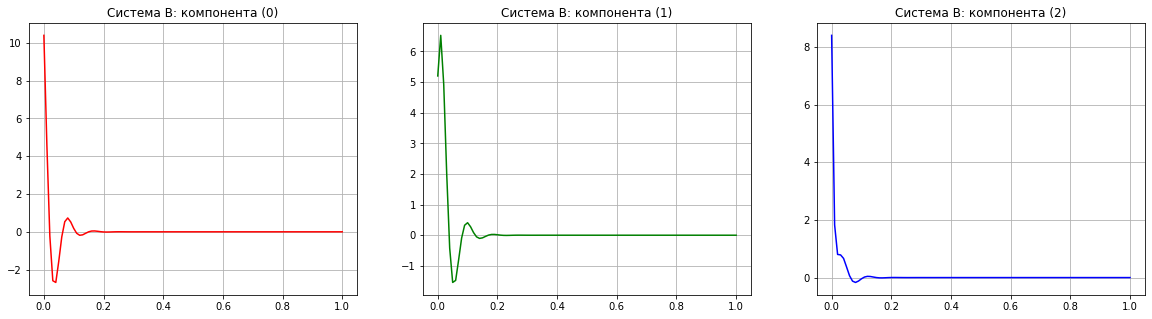

In [105]:
h = 0.01
t0, T = 0, 1
t = np.arange(t0, T + h, h)
n = round((T - t0) / h)

i_eiler_y_B = ImplicitEiler(B, Z0, h, n)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].set_title('Система B: компонента (0)')
axs[0].plot(t, i_eiler_y_B[0], color='r')
axs[0].grid()
axs[1].set_title('Система B: компонента (1)')
axs[1].plot(t, i_eiler_y_B[1], color='g')
axs[1].grid()
axs[2].set_title('Система B: компонента (2)')
axs[2].plot(t, i_eiler_y_B[2], color='b')
axs[2].grid()

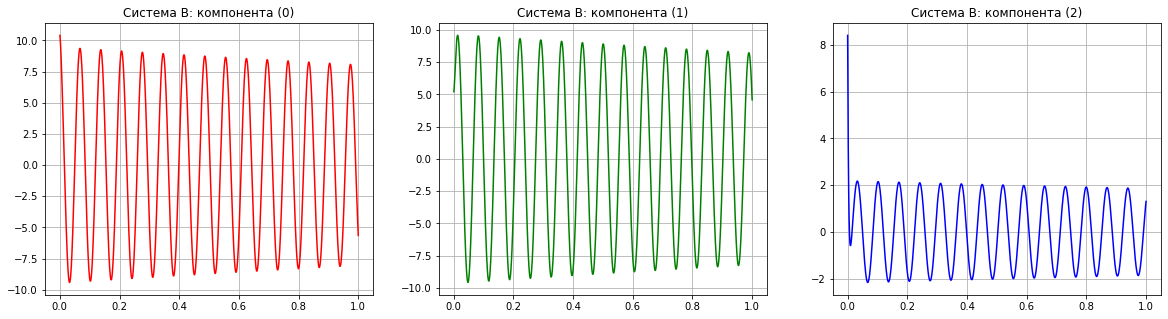

In [81]:
h = 0.0007
t0, T = 0, 1
t = np.arange(t0, T + h, h)
eiler_y_B = Eiler(Z0, t, F2, h)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].set_title('Система B: компонента (0)')
axs[0].plot(t, eiler_y_B[0], color='r')
axs[0].grid()
axs[1].set_title('Система B: компонента (1)')
axs[1].plot(t, eiler_y_B[1], color='g')
axs[1].grid()
axs[2].set_title('Система B: компонента (2)')
axs[2].plot(t, eiler_y_B[2], color='b')
axs[2].grid()

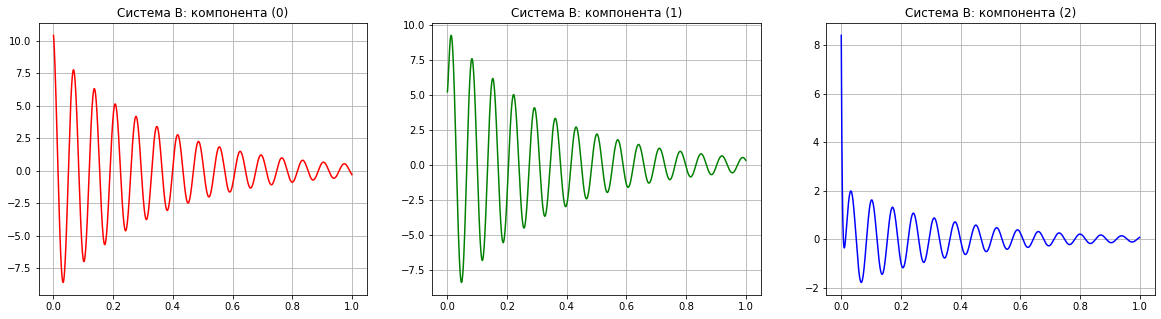

In [89]:
h = 1e-5
t0, T = 0, 1
t = np.arange(t0, T + h, h)
eiler_y_B = Eiler(Z0, t, F2, h)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].set_title('Система B: компонента (0)')
axs[0].plot(t, eiler_y_B[0], color='r')
axs[0].grid()
axs[1].set_title('Система B: компонента (1)')
axs[1].plot(t, eiler_y_B[1], color='g')
axs[1].grid()
axs[2].set_title('Система B: компонента (2)')
axs[2].plot(t, eiler_y_B[2], color='b')
axs[2].grid()

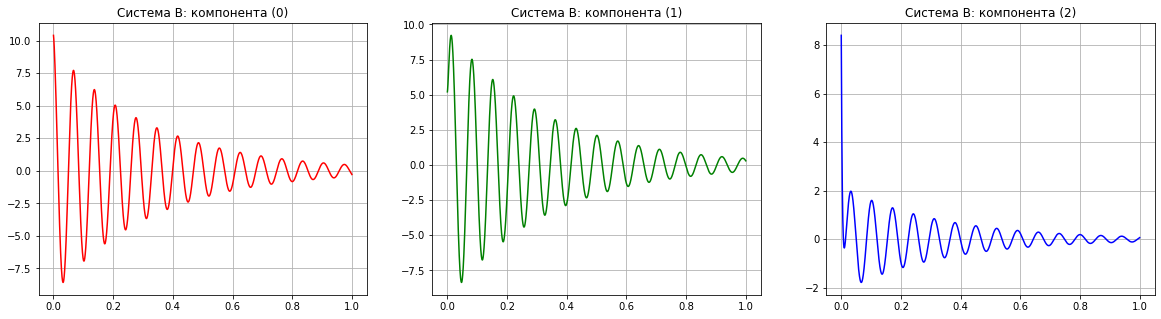

In [111]:
h = 1e-5
t0, T = 0, 1
t = np.arange(t0, T + h, h)
n = round((T - t0) / h)

i_eiler_y_B = ImplicitEiler(B, Z0, h, n)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].set_title('Система B: компонента (0)')
axs[0].plot(t, i_eiler_y_B[0], color='r')
axs[0].grid()
axs[1].set_title('Система B: компонента (1)')
axs[1].plot(t, i_eiler_y_B[1], color='g')
axs[1].grid()
axs[2].set_title('Система B: компонента (2)')
axs[2].plot(t, i_eiler_y_B[2], color='b')
axs[2].grid()

**Вывод.**

Для системы B теоретическая оценка шага: $h \leq 0.007$. Однако, путем тестирования работы метода при различных шагах было выявлено, что явный метод Эйлера начинает хоть как-то сходиться лишь начиная с шага $h = 0.0007$, то есть на порядок меньшего, чем теоретический, а при большем шаге метод расходится, что противоречит оценке. При еще большем уменьшении шага видимый эффект пропадает примерно после шага $h=10^{-5}$, далее изменения на графиках становятся не видны, однако время работы программы существенно увеличивается. Визуальное совпадение графиков стало возможным лишь при шаге $h=10^{-5}$ для явного и неявного метода Эйлера.